# Data Science and Business Analytics GRIP SEPT'21
# Prediction using Unsupervised ML 

## Task 2 - To predict the optimum number of clusters from the Iris Dataset and represent them visually.  
## Author - Ammish Tandon

### Dataset Link - https://bit.ly/3kXTdox

##  Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
df = pd.read_csv("Iris.csv")

## Exploring the Dataset

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


## Data Cleaning

The Id column isn't providing us any meaningful information and the same can be done using the Index of the DataFrame. Hence, I'll drop the Id column.

In [7]:
df = df.drop("Id", axis = 1)

Now, I'll check for any missing data.

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Clearly, there isn't any missing data.

## Counting Flowers in Each Species

In [9]:
df["Species"].value_counts()  

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

As there are equal number of flowers in each species, we're working with a balanced dataset.

## Clustering Task

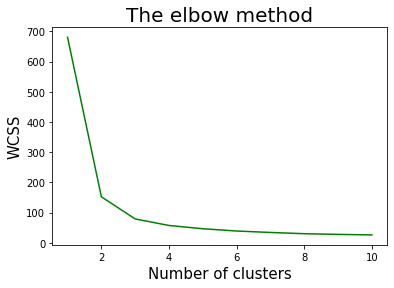

In [10]:
import warnings
warnings.filterwarnings("ignore")

# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values 

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph to observe the 'elbow'

plt.plot(range(1, 11), wcss, color="green")
plt.title('The elbow method', fontsize=20)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('WCSS', fontsize=15) # Within cluster sum of squares
plt.show()

The optimum number of clusters is where the elbow occurs, i.e where the WCSS doesn't decrease significantly with every iteration. So we can choose the number of clusters as 3.

In [11]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

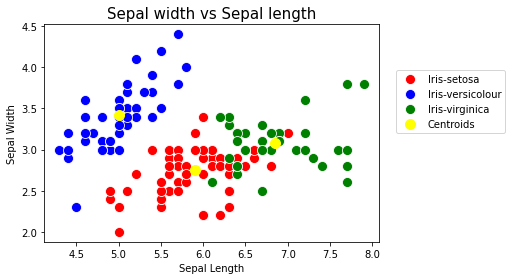

In [12]:
# Visualising the clusters - On the first two columns
sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, color = 'red', label = 'Iris-setosa')
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, color = 'blue', label = 'Iris-versicolour')
sns.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, color = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Sepal width vs Sepal length',fontsize=15)
plt.xlabel('Sepal Length',fontsize=10)
plt.ylabel('Sepal Width',fontsize=10)

plt.legend(loc = (1.05, 0.5));

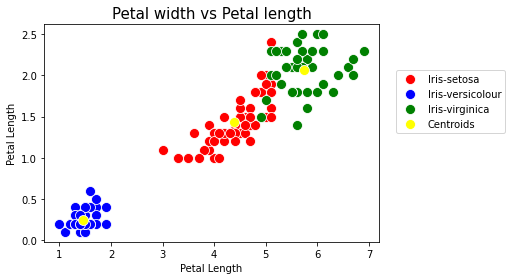

In [13]:
sns.scatterplot(x[y_kmeans == 0, 2],x[y_kmeans == 0, 3], s = 100, color ='red', label = 'Iris-setosa',)
sns.scatterplot(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, color = 'blue', label = 'Iris-versicolour',)
sns.scatterplot(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, color ='green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
sns.scatterplot(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, color = 'yellow', label = 'Centroids')

plt.title('Petal width vs Petal length',fontsize=15)
plt.xlabel('Petal Length',fontsize=10)
plt.ylabel('Petal Length',fontsize=10) 
plt.legend(loc = (1.05, 0.5));

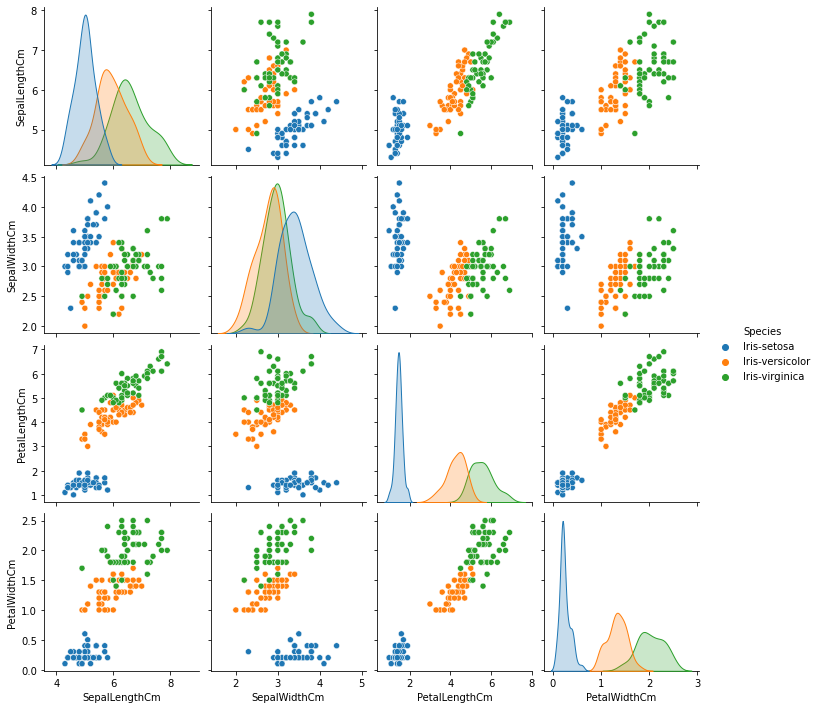

In [14]:
sns.pairplot(df, hue = "Species");

## So to conclude, the optimum number of clusters in the Iris Dataset is 3.